In [1]:
# import packages
import cartopy as cp
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [4]:
# import data
infile = "./Data/jma_nitrate.csv"
data = pd.read_csv(infile, sep = ',')

subset = data[(data.nitrate>=0) & (data.depth <10)]

data.columns

Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')

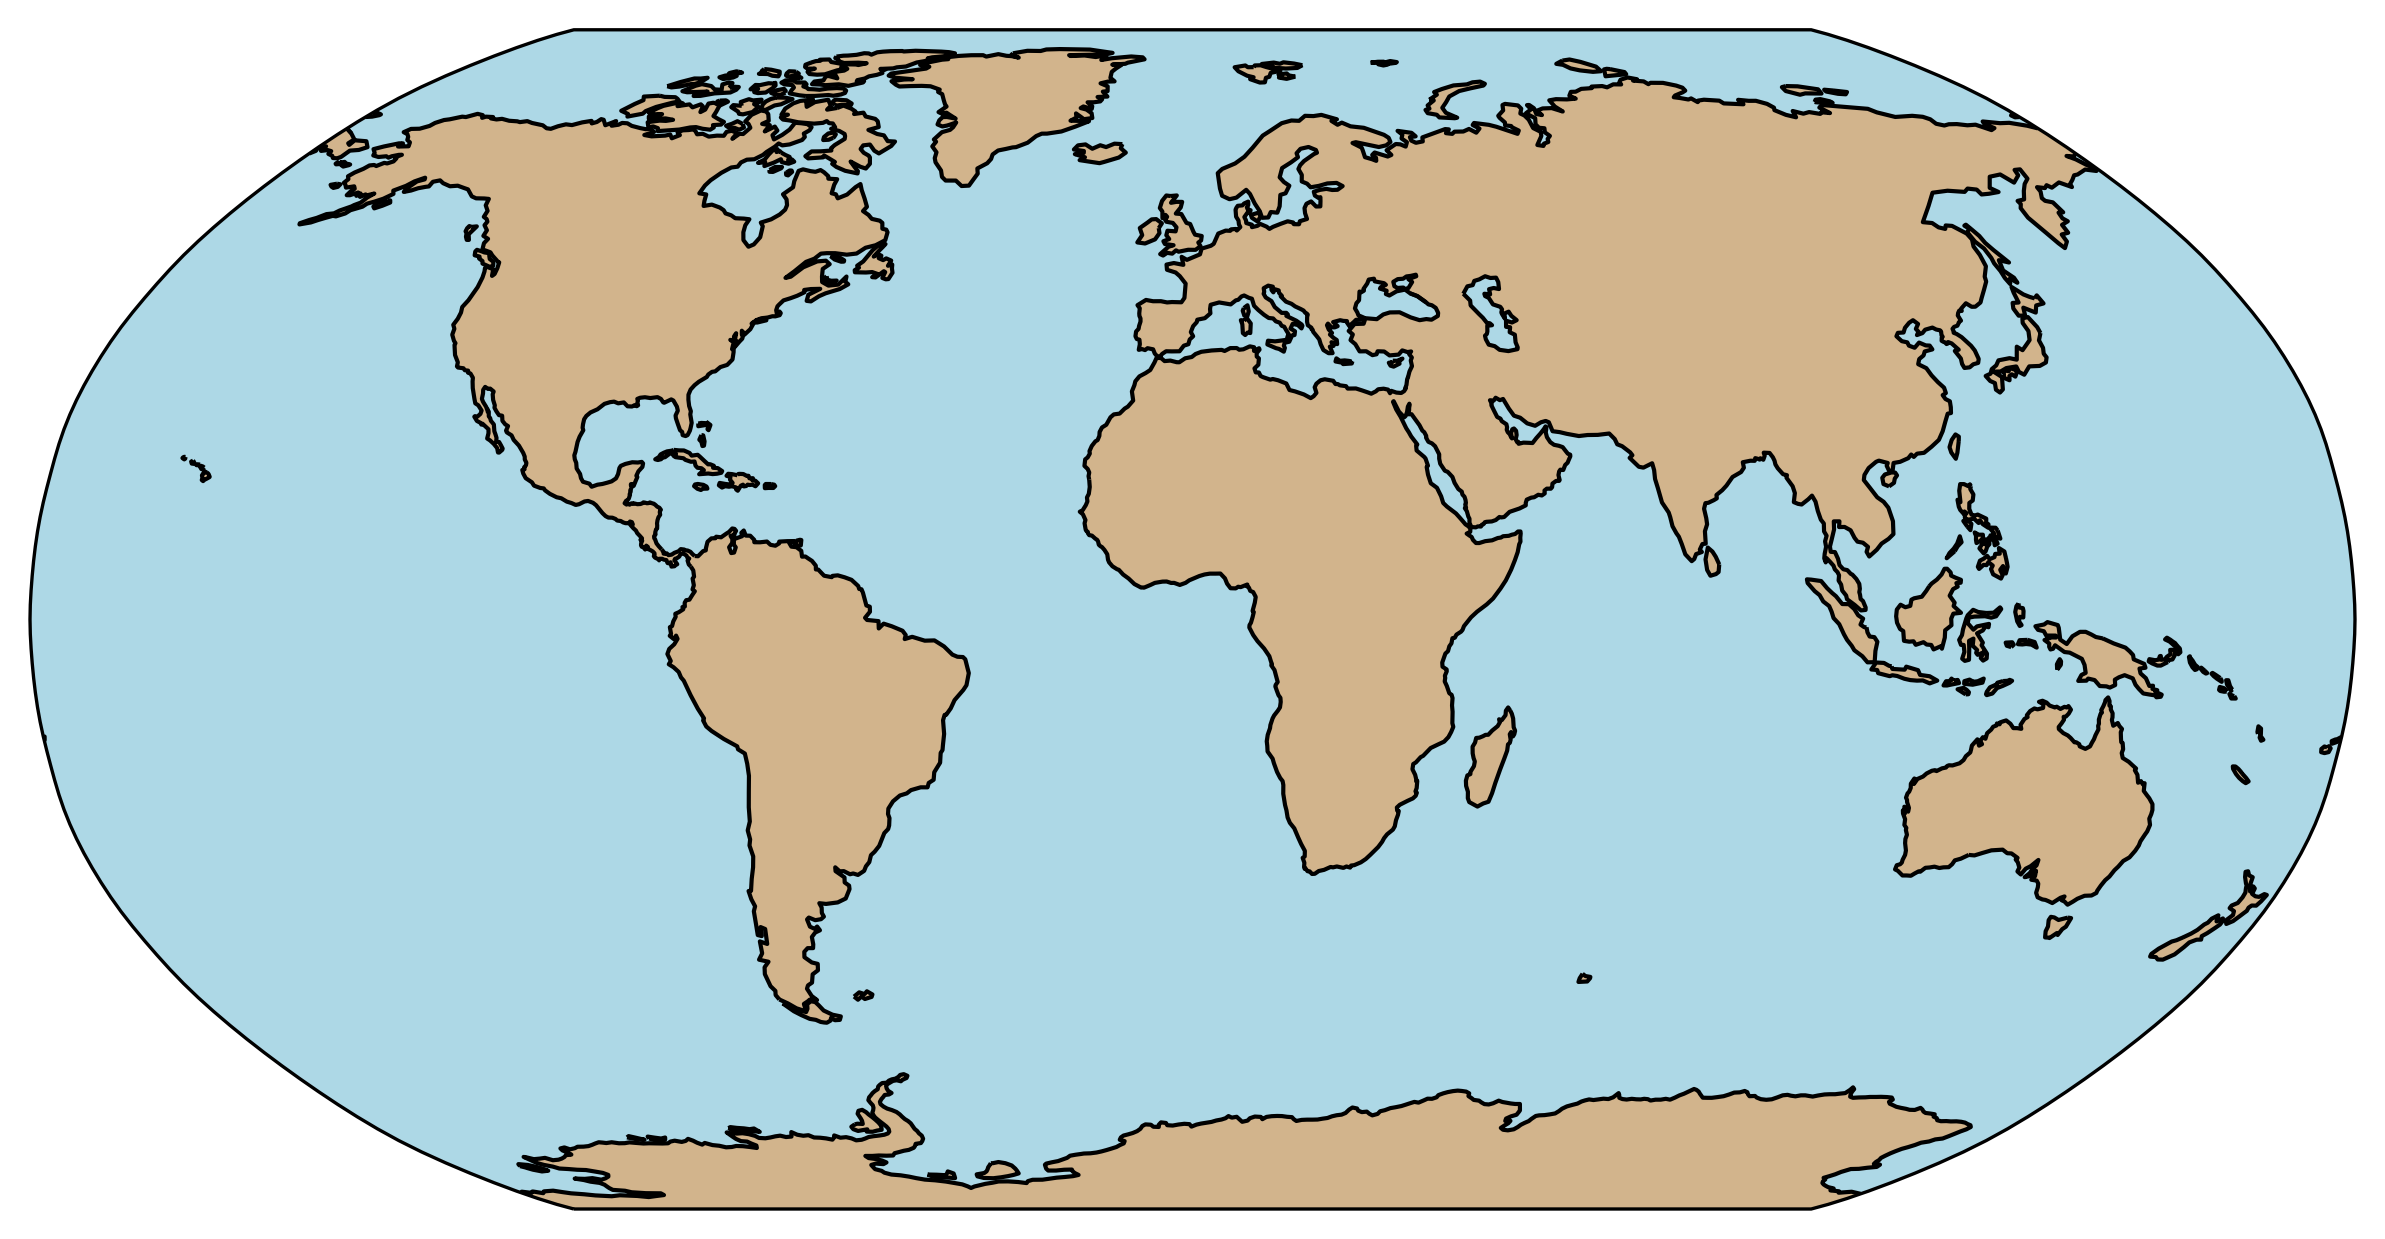

In [13]:
# Create a blank global map

fig = plt.figure(figsize = (10,8), dpi = 300)

ax = fig.add_subplot(1,1,1, projection = ccrs.Robinson())
ax.set_global()

ax.coastlines()

ax.add_feature(cp.feature.OCEAN, facecolor = 'lightblue')
ax.add_feature(cp.feature.LAND, facecolor = 'tan')

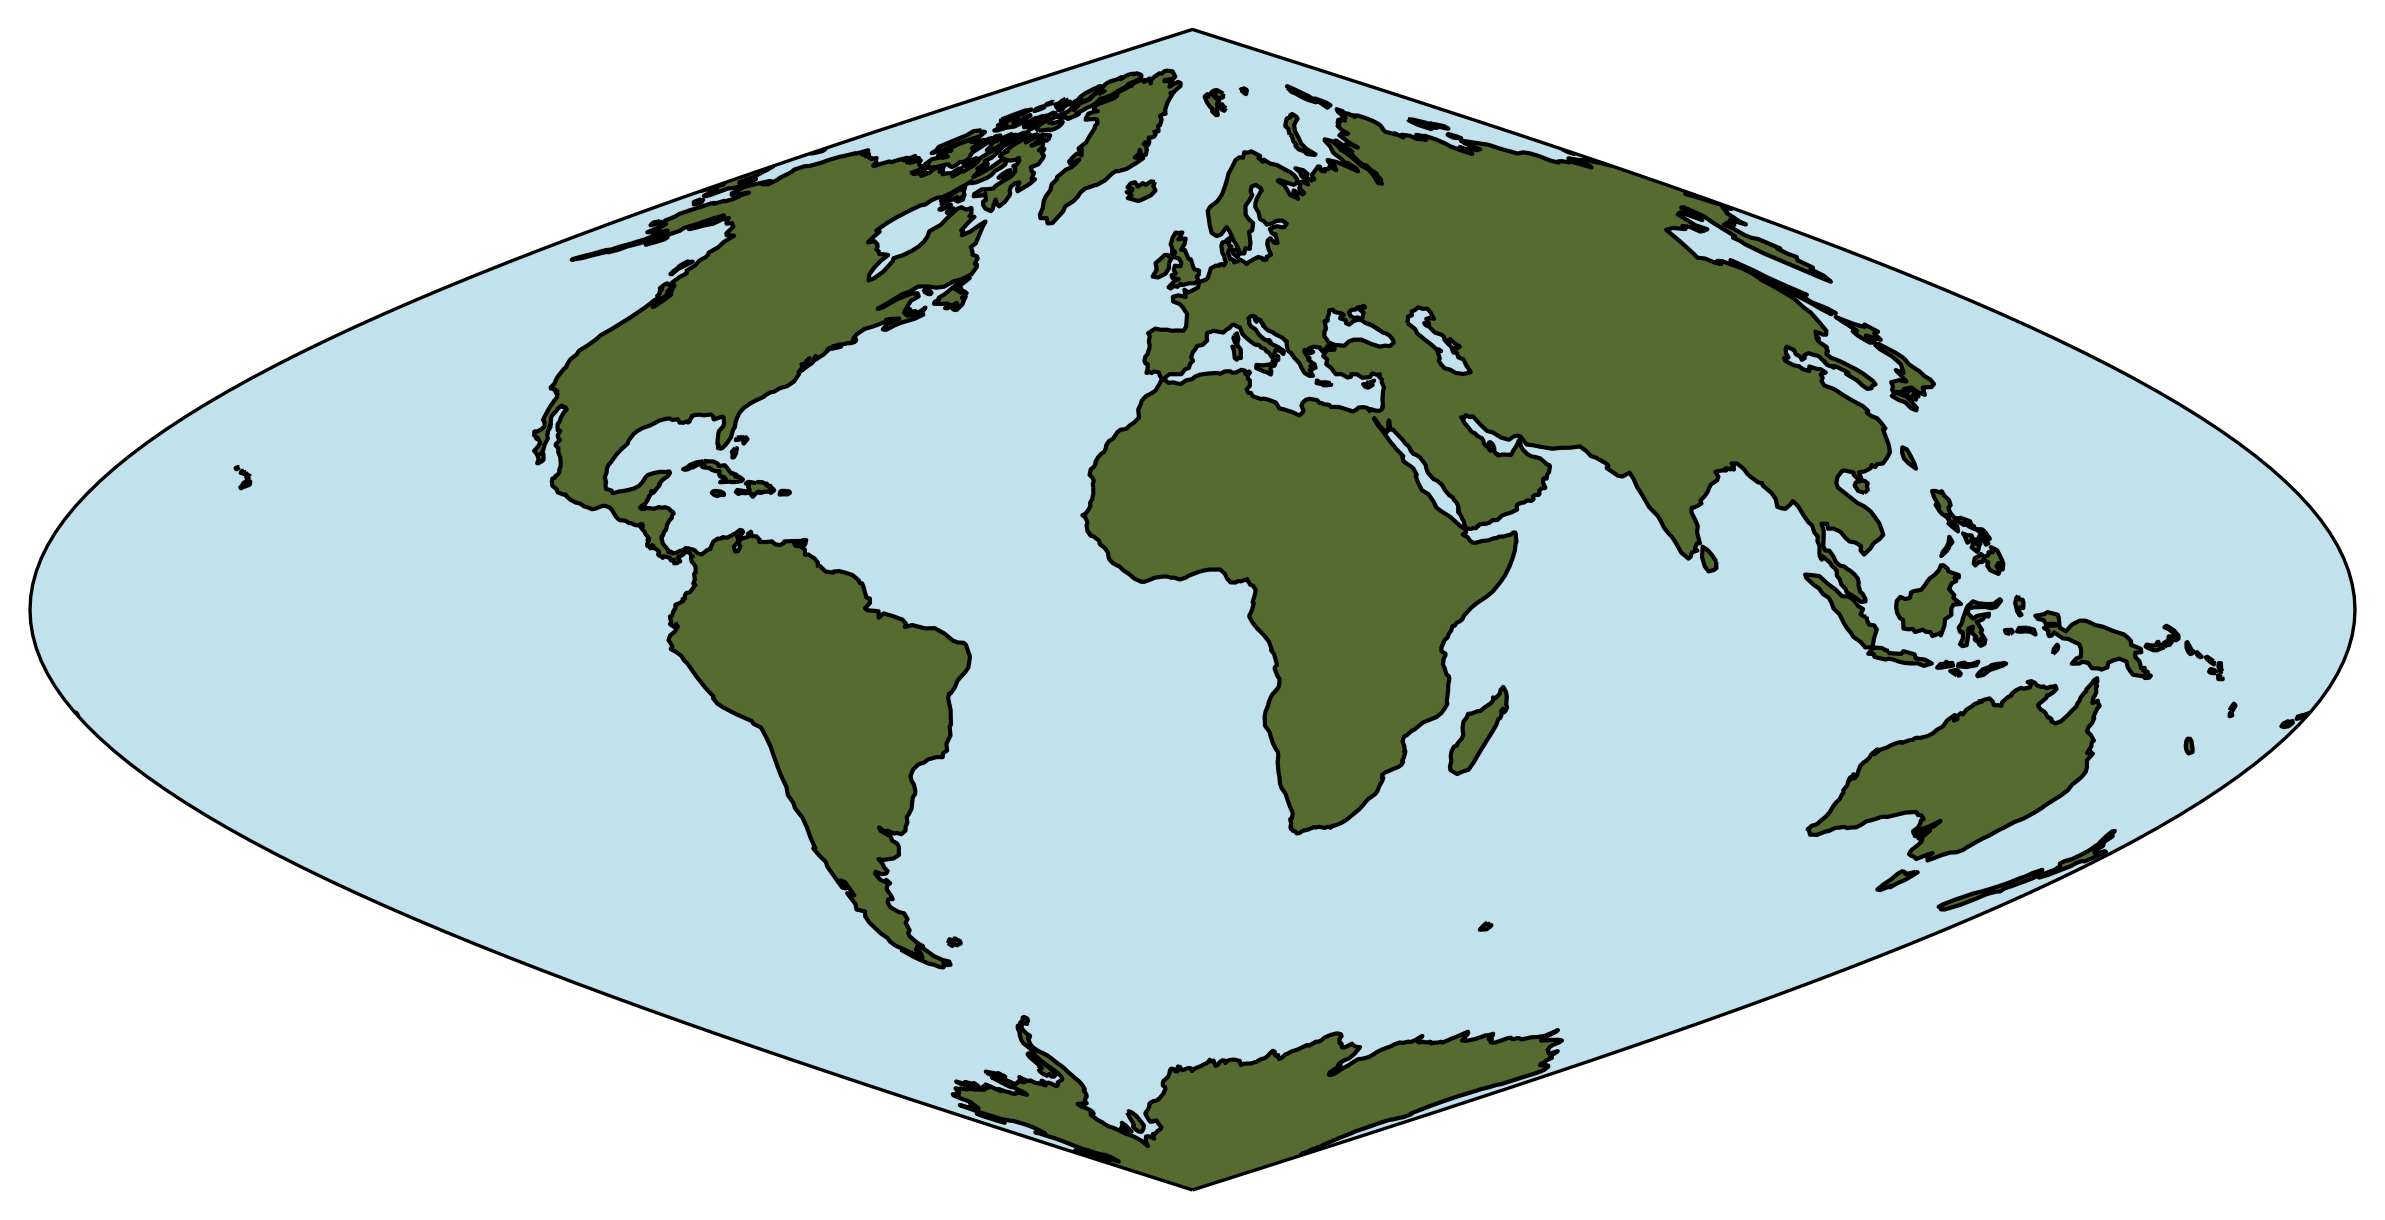

In [31]:
# Using a new projection

fig2 = plt.figure(figsize = (10,8), dpi = 300)

ax2 = fig2.add_subplot(1,1,1, projection = ccrs.Sinusoidal(central_longitude=0.0, false_easting=0.0, false_northing=0.0, globe=None))
ax2.set_global()

ax2.coastlines()

ax2.add_feature(cp.feature.OCEAN, facecolor = 'lightblue', alpha = 0.75)
ax2.add_feature(cp.feature.LAND, facecolor = 'darkolivegreen')

fig2.savefig('./Figures/beautiful_map.png', dpi = 300)

/Users/Emma/opt/anaconda3/envs/Class230119/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/Emma/opt/anaconda3/envs/Class230119/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


Text(-0.07, 0.55, 'latitude')

/Users/Emma/opt/anaconda3/envs/Class230119/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/Emma/opt/anaconda3/envs/Class230119/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


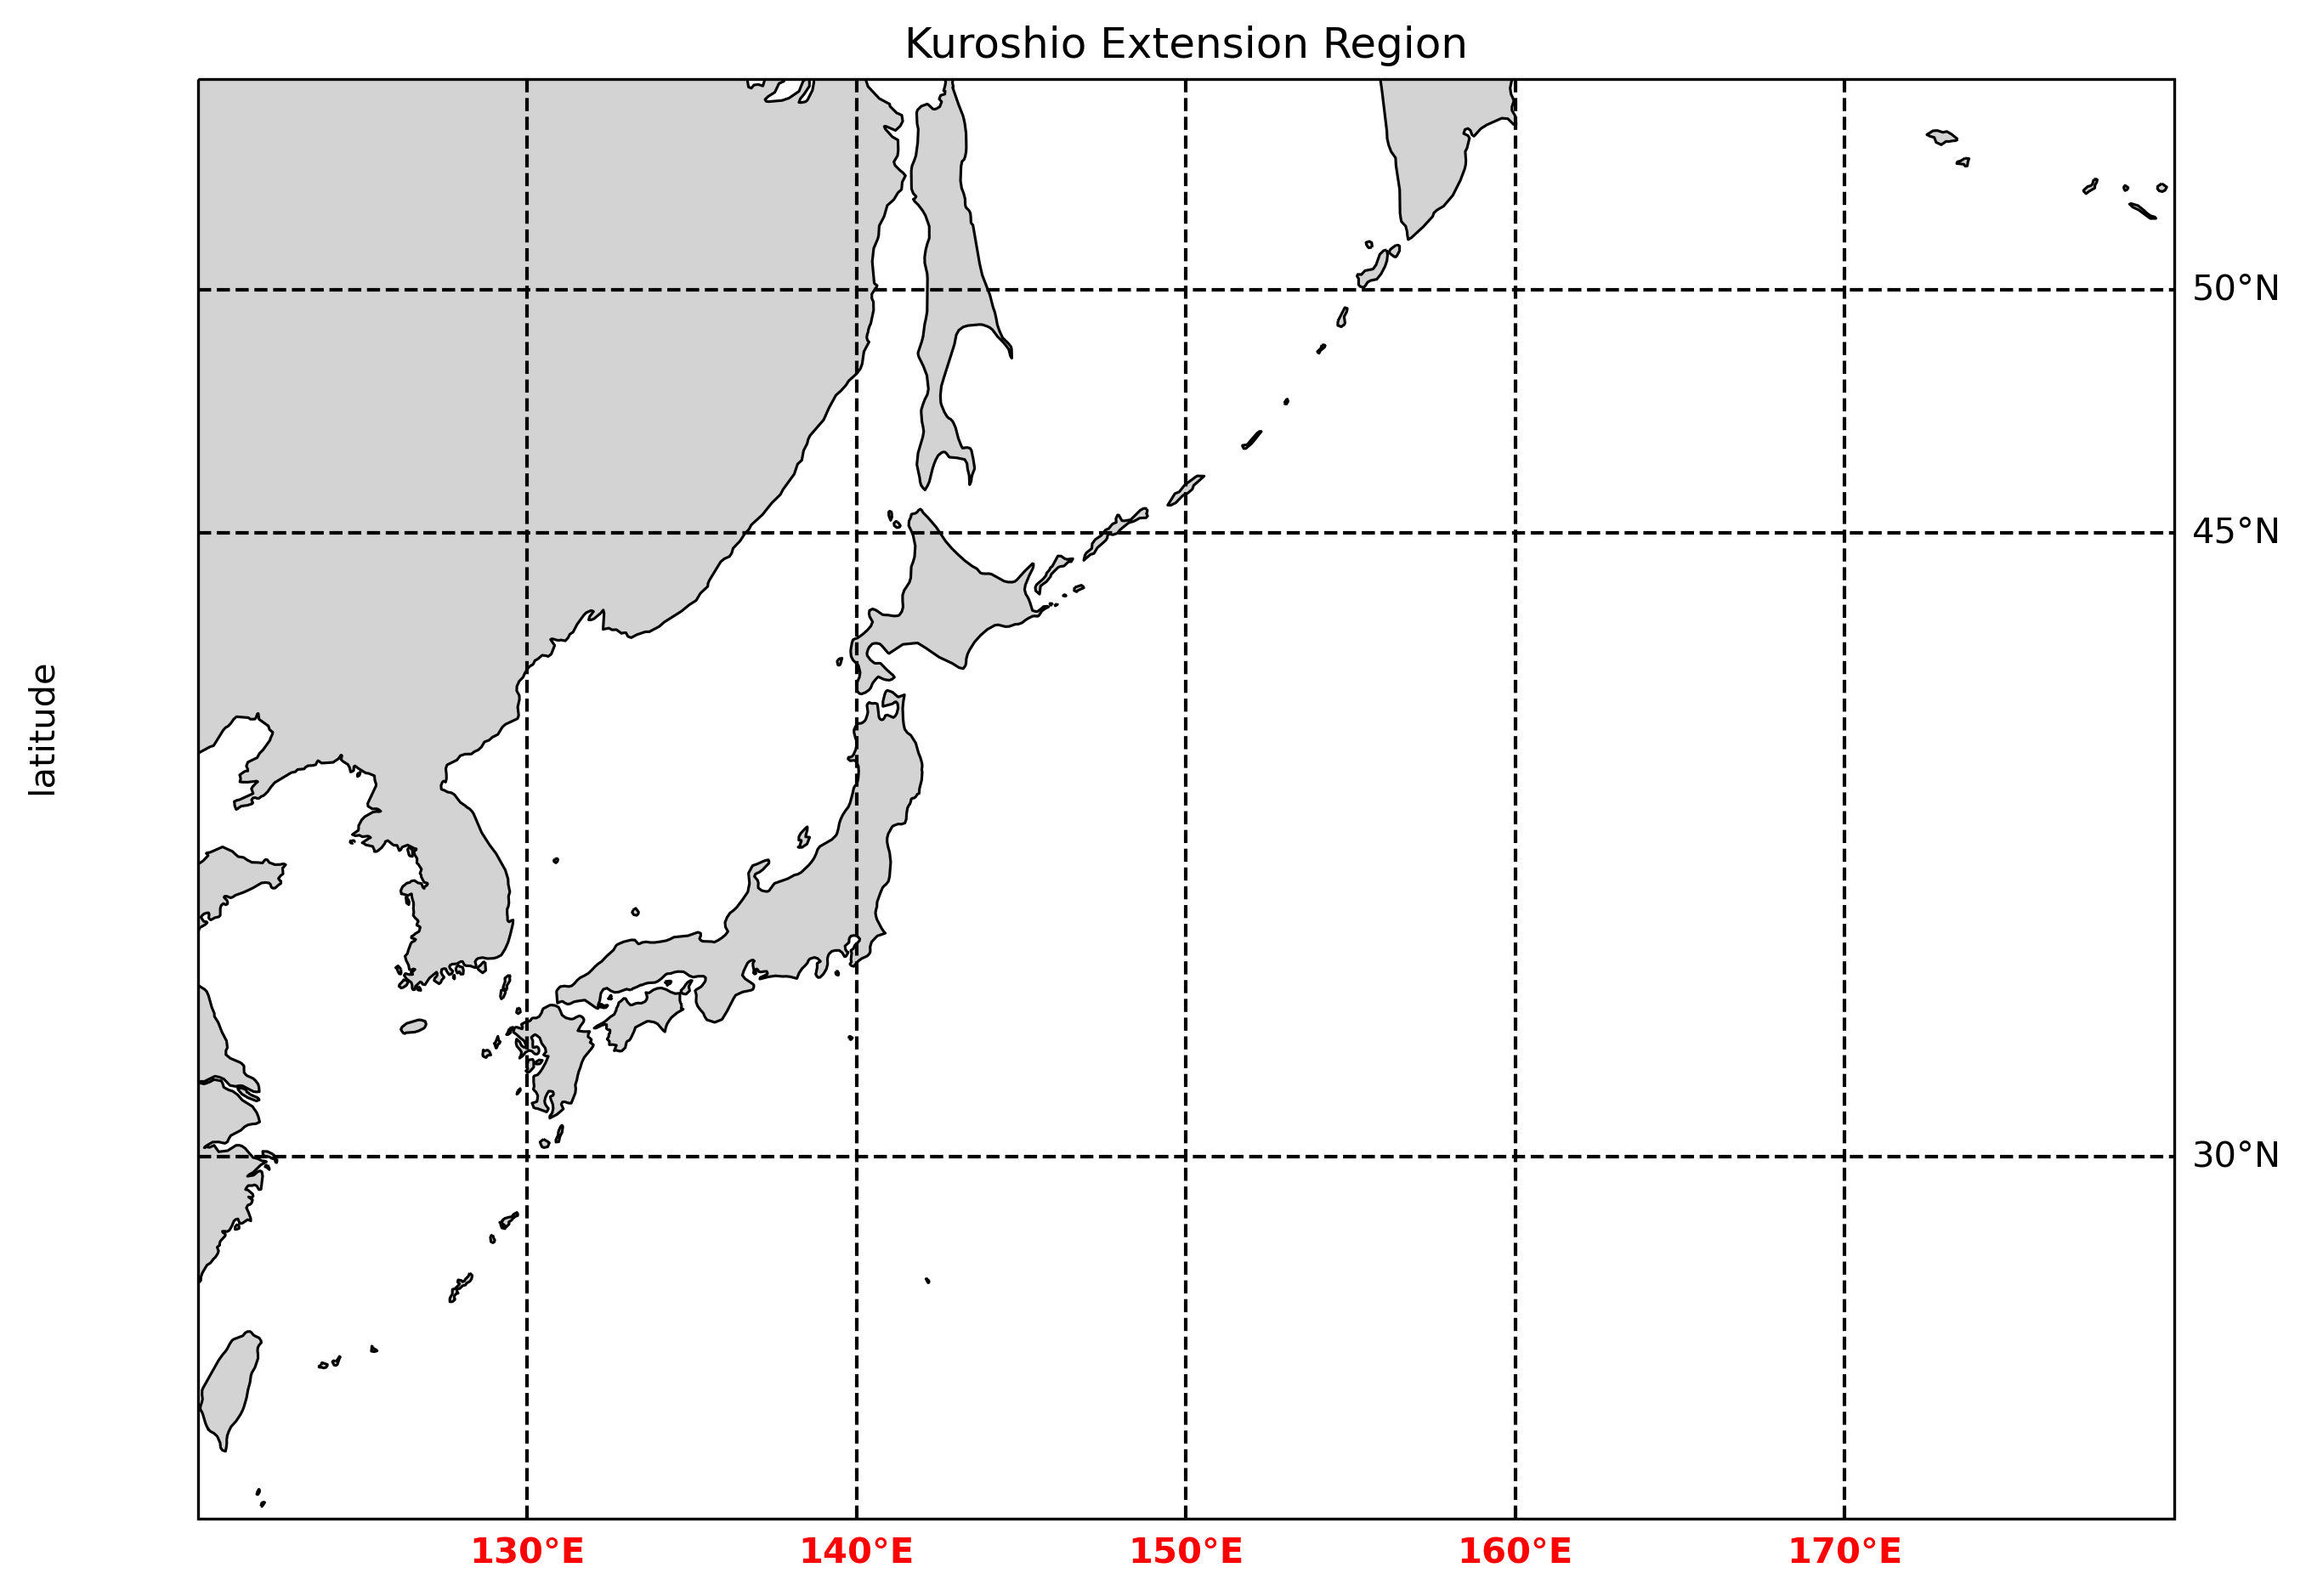

In [32]:
# Create a regional map with parallels and meridians

fig = plt.figure(figsize = (10,8), dpi = 300)
ax = fig.add_subplot(1,1,1, projection = ccrs.Mercator
                     (central_longitude = 0.0, min_latitude = 20.0, 
                      max_latitude = 55.0))

# ax.set_extent(east, west, south, north)
ax.set_extent([120.0, 180.0, 20.0, 50.0])

# Being picky with our coastlines
ax.coastlines(linewidth=0.75, color='black')

# Map title
ax.set_title('Kuroshio Extension Region')#, color = 'red', weight = 'bold')
# how to add lines of latitude and longitude
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k',linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

gl.ylocator = mticker.FixedLocator([20, 30, 45, 50, 55])

gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey')

# if you want to add text axes labels
ax.text(-0.07, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)